In [15]:
## imports and globals

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DUMMY_ACCT_BASE = 100000
STDDEV_CUTOFF = 1.5
MONTH_CUTOFF = 3

## list of the columns with gas usage by month
therm_months = ['thrm_jan', 'thrm_feb', 'thrm_mar', 'thrm_apr', 'thrm_may', 'thrm_jun',
                'thrm_jul', 'thrm_aug', 'thrm_sep', 'thrm_oct', 'thrm_nov', 'thrm_dec']

In [3]:
## read in csv
svce_df = pd.read_csv('data/Powerhouse_SunCode_SVCE_Data.csv', index_col=False)

## Create dummy account numbers for dataset as index
svce_df['ACCT_NUMBER'] = np.arange(len(svce_df)) + DUMMY_ACCT_BASE
svce_df.set_index('ACCT_NUMBER', inplace=True)

## Create column of total therm usage
svce_df['total_therms'] = svce_df[therm_months].sum(axis=1)
display(svce_df.head(5))

,CITY,ENDUSE,CSCHJAN_2018,CSCHFEB_2018,CSCHMAR_2018,CSCHAPR_2018,CSCHMAY_2018,CSCHJUN_2018,CSCHJUL_2018,CSCHAUG_2018,...,thrm_may,thrm_jun,thrm_jul,thrm_aug,thrm_sep,thrm_oct,thrm_nov,thrm_dec,Advanced_Vehicle_Fuel,total_therms
ACCT_NUMBER,,,,,,,,,,,,,,,,,,,,,
100000,UNINCORPORATED,BASIC ELECTRICITY,E1,E1,E1,E1,E1,E1,E1,E1,...,30.0,18.0,14.0,16.0,19.0,17.0,22.0,68.0,NaN,438.0
100001,SARATOGA,BASIC ELECTRICITY,ETOUA,ETOUA,ETOUA,ETOUA,ETOUA,ETOUA,ETOUA,ETOUA,...,70.0,45.0,49.0,70.0,44.0,47.0,179.0,223.0,NaN,1548.0
100002,CAMPBELL,BASIC ELECTRICITY,E1,E1,E1,E1,E1,E1,E1,E1,...,24.0,20.0,14.0,26.0,NaN,15.0,16.0,27.0,NaN,282.0
100003,LOS ALTOS,BASIC ELECTRICITY,E1,E1,E1,E1,E1,E1,E1,E1,...,24.0,18.0,17.0,18.0,16.0,14.0,25.0,34.0,NaN,385.0
100004,UNINCORPORATED,ALL ELEC./SPACE HEAT 1985 ONLY,E1,E1,E1,E1,E1,E1,E1,E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [6]:
## function to apply to rows to determine the # of months above STDDEV_CUTOFFs above std_dev
##   and most extreme month above in terms of std_dev above

## brute force method -- numpy array implementation would be much faster
def calculate_months_above(bed, df):
    ''' This function returns a series to be added as a new column representing the 
        number of months that this user is STDDEV_CUTOFFs (currently 1.5) times the standard
        deviation above the median for bed number of bedroom households'''
    for month in therm_months:
        key = month+"_"+str(bed)
        df.loc[:,month] = df.loc[:,month].apply(lambda x: (x - std_cutoffs[key] > 0))
        
    months_above = df.sum(axis=1)
    return months_above
  

In [7]:
## add column for number of months above the median
#svce_df['months_above'] = 0

## create dfs for every bedroom category
## bed_dict[#] accesses the df with # of bedrooms
bed_dict = {beds: svce_df[svce_df['BEDROOMS'] == beds] 
            for beds in range(svce_df['BEDROOMS'].max()+1)}

## dicts to hold values by # of bedrooms and month
medians = {}
std_devs = {}
std_cutoffs = {}  

## determine mean, and std_dev for each month 
## calculate number of months acct is above STDDEV_CUTOFFs above std_dev
for bed, df in bed_dict.items():
    for month in therm_months:
        key = month+"_"+str(bed)
        medians[key] = df[month].median()
        std_devs[key] = df[month].std()
        std_cutoffs[key] = (medians[key] + std_devs[key] * STDDEV_CUTOFF)
        
    df.loc[:,'months_above'] = calculate_months_above(bed, df[therm_months])
    
    display(df[['CITY','BEDROOMS', 'TOTAL_AREA', 'months_above']].head(5))

,CITY,BEDROOMS,TOTAL_AREA,months_above
ACCT_NUMBER,,,,
101008,LOS GATOS,0,750,0
102692,UNINCORPORATED,0,3750,0
104596,LOS GATOS,0,750,0
104702,CUPERTINO,0,750,0
105314,MORGAN HILL,0,250,0


,CITY,BEDROOMS,TOTAL_AREA,months_above
ACCT_NUMBER,,,,
100019,MOUNTAIN VIEW,1,750,0
100028,MOUNTAIN VIEW,1,750,0
100055,MILPITAS,1,500,0
100114,UNINCORPORATED,1,1000,0
100168,MOUNTAIN VIEW,1,750,0


,CITY,BEDROOMS,TOTAL_AREA,months_above
ACCT_NUMBER,,,,
100000,UNINCORPORATED,2,1000,0
100002,CAMPBELL,2,1250,0
100008,LOS ALTOS,2,750,0
100010,LOS ALTOS,2,1000,0
100017,LOS ALTOS,2,1000,0


,CITY,BEDROOMS,TOTAL_AREA,months_above
ACCT_NUMBER,,,,
100004,UNINCORPORATED,3,750,0
100005,SUNNYVALE,3,1000,0
100007,SARATOGA,3,2500,8
100012,CAMPBELL,3,2000,0
100013,UNINCORPORATED,3,2500,8


,CITY,BEDROOMS,TOTAL_AREA,months_above
ACCT_NUMBER,,,,
100001,SARATOGA,4,5000,9
100003,LOS ALTOS,4,1750,0
100006,CAMPBELL,4,2250,0
100009,SUNNYVALE,4,1750,0
100011,GILROY,4,2000,0


,CITY,BEDROOMS,TOTAL_AREA,months_above
ACCT_NUMBER,,,,
100031,SUNNYVALE,5,3000,0
100050,SUNNYVALE,5,2000,0
100057,CUPERTINO,5,3500,0
100068,MILPITAS,5,3000,0
100083,MILPITAS,5,3500,2


In [8]:
for bed, df in bed_dict.items():
    print ("{} out of {} total households with above average gas usage with {} bedrooms".format(len(df[df['months_above'] >= MONTH_CUTOFF]), len(df), bed))

4 out of 43 total households with above average gas usage with 0 bedrooms
80 out of 1048 total households with above average gas usage with 1 bedrooms
361 out of 8090 total households with above average gas usage with 2 bedrooms
2626 out of 23177 total households with above average gas usage with 3 bedrooms
1857 out of 17969 total households with above average gas usage with 4 bedrooms
633 out of 6344 total households with above average gas usage with 5 bedrooms


Targetted Households by  number of bedrooms
=====================================

4 out of 43 total households with above average gas usage with 0 bedrooms<br>
80 out of 1048 total households with above average gas usage with 1 bedrooms<br>
361 out of 8090 total households with above average gas usage with 2 bedrooms<br>
2626 out of 23177 total households with above average gas usage with 3 bedrooms<br>
1857 out of 17969 total households with above average gas usage with 4 bedrooms<br>
633 out of 6344 total households with above average gas usage with 5 bedrooms

In [9]:
## create a csv of targeted households

months_above_cat = pd.concat(bed_dict.values())
targeted = months_above_cat[months_above_cat['months_above'] >= MONTH_CUTOFF]
    
targeted.to_csv('data/targeted.csv')

In [10]:
## create a json of targeted households total therm usage
targeted['total_therms'].to_json('data/targeted_total.json')

In [11]:
## create a list of account numbers to access via json as examples
loclist = [3, 3+80, 3+80+361, 3+80+361+2626, 3+80+361+2626+1857, 3+80+361+2626+1857+633] # last member of each bdrm group
acctlist = targeted.index.values[loclist]
print(acctlist)

[143385 155951 156175 156631 156648 156578]


LIST OF RANDOM ACCTS TO USE AS EXAMPLE DATA FROM JSON
=====================================================

143385 155951 156175 156631 156648 156578<br><br>
(We ran out of time to grab these accounts from the json file to populate actual total therm usage)


Bonus EDA not used by our project
---------------------------------
<br><br><br>
HEY SVCE: WHAT'S GOING ON IN MOUNTAIN VIEW!!?!?
============================================

See the plots below to check out some extreme gas usage in Mountain View
-----------------------------------------------------------------------------------------

In [21]:
## borrowed this function from https://towardsdatascience.com/a-starter-pack-to-exploratory-data-analysis-with-python-pandas-seaborn-and-scikit-learn-a77889485baf

def quantitative_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', ax=None, verbose=True, swarm=False):
    '''
    Helper function that gives a quick summary of quantattive data
    Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data (usually the target variable)
    y: str. vertical axis to plot the quantitative data
    hue: str. if you want to compare it another categorical variable (usually the target variable if x is another variable)
    palette: array-like. Colour of the plot
    swarm: if swarm is set to True, a swarm plot would be overlayed
    Returns
    =======
    Quick Stats of the data and also the box plot of the distribution
    '''
    series = dataframe[y]
    
    if verbose:
        print(series.describe())
        print('mode: ', series.mode())
        print('='*80)
        print(series.value_counts())

    sns.boxplot(x=x, y=y, hue=hue, data=dataframe, palette=palette, ax=ax)
    #rotate xtick labels so that city names are readable
    plt.xticks(rotation=90)
  

    if swarm:
        sns.swarmplot(x=x, y=y, hue=hue, data=dataframe,
                      palette=palette, ax=ax)

    plt.figure(figsize=(20, 6))
    plt.show()

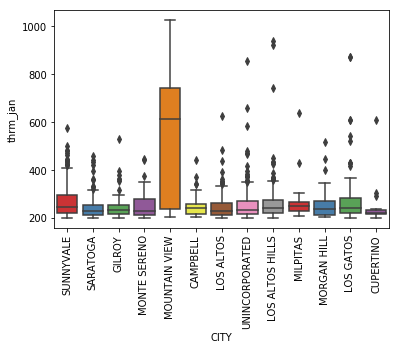

<Figure size 1440x432 with 0 Axes>

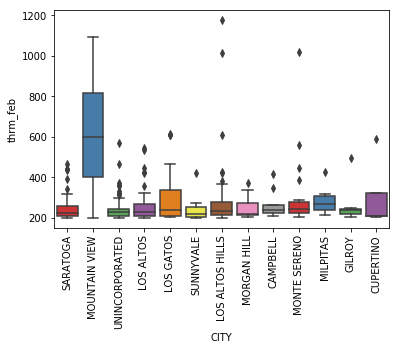

<Figure size 1440x432 with 0 Axes>

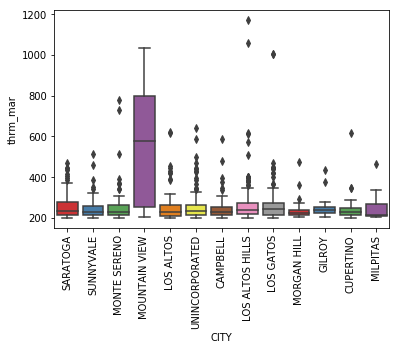

<Figure size 1440x432 with 0 Axes>

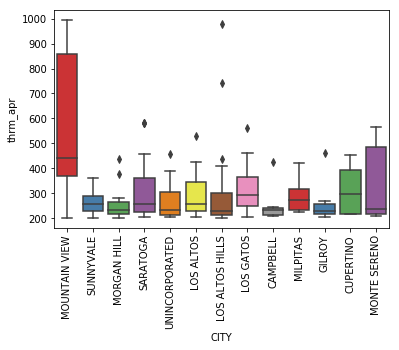

<Figure size 1440x432 with 0 Axes>

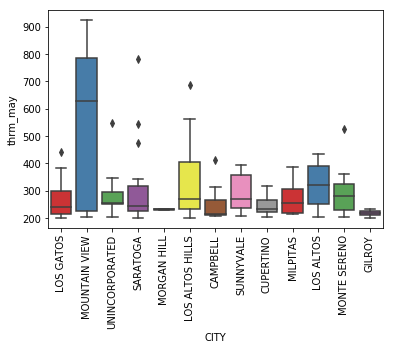

<Figure size 1440x432 with 0 Axes>

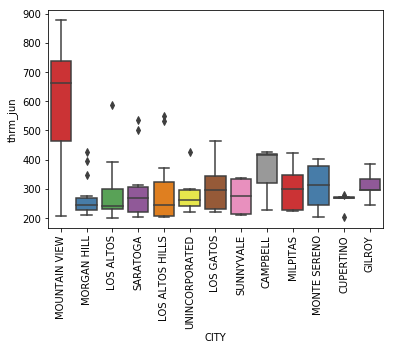

<Figure size 1440x432 with 0 Axes>

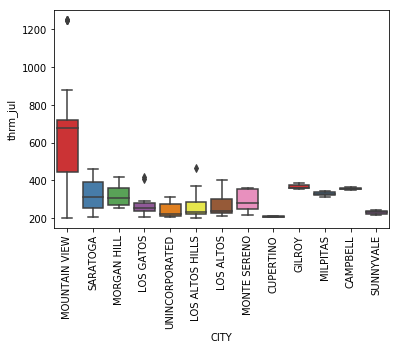

<Figure size 1440x432 with 0 Axes>

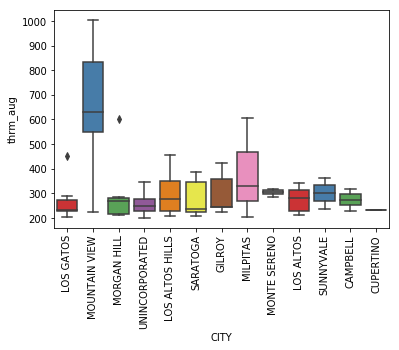

<Figure size 1440x432 with 0 Axes>

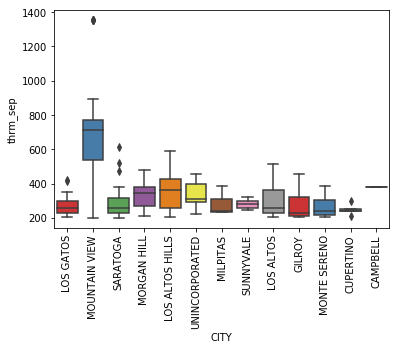

<Figure size 1440x432 with 0 Axes>

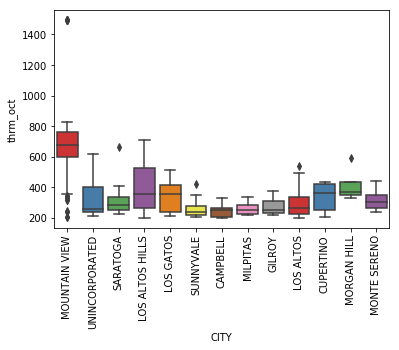

<Figure size 1440x432 with 0 Axes>

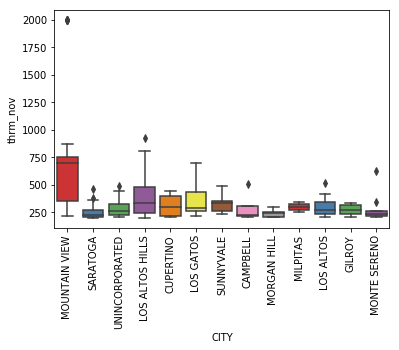

<Figure size 1440x432 with 0 Axes>

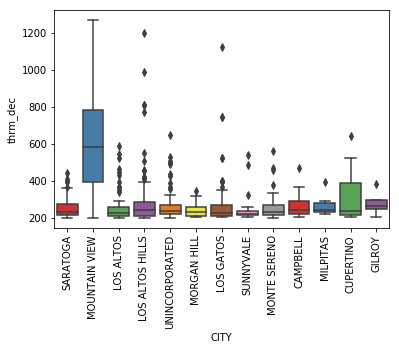

<Figure size 1440x432 with 0 Axes>

In [22]:
## a tiny bit of eda on high users by location
## notice Mountain View's crazy high usage

# users who use more than 200 therms
for month in therm_months:
    crazy_usage = svce_df[svce_df[month] > 200]
    # display(crazy_usage.info())
    # display(crazy_usage.head(10))
    quantitative_summarized(crazy_usage, x='CITY', y=month, hue=None, palette='Set1', ax=None, verbose=False, swarm=False)

## this csv was never actually used...no longer recreating it just to display plots
#crazy_usage.to_csv('data/high_gas_usage.csv')

In [24]:
## print out the number of accounts by city
## Mountain View is the second most populous area, but that doesn't seem to account for the crazy usage in any way

print(svce_df.groupby('CITY')['CITY'].count().sort_values(ascending=False))

CITY
SUNNYVALE          10282
MOUNTAIN VIEW       6590
UNINCORPORATED      6003
CUPERTINO           5623
GILROY              4139
MILPITAS            4130
LOS ALTOS           3908
SARATOGA            3891
MORGAN HILL         3872
CAMPBELL            3519
LOS GATOS           3210
LOS ALTOS HILLS     1075
MONTE SERENO         429
Name: CITY, dtype: int64
